# 第4章 非平稳序列的随机分析

## 1 导入库

In [1]:
import datetime
import pandas as pd
import numpy as np
import os
import matplotlib as  mpl

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号




习题数据="./习题与案例数据/习题数据/"
案例数据="./习题与案例数据/案例数据/"
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm

/Users/pengju/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 使用Q_LB进行白噪音假设
def my_Q_LB(ts,out_lags_list=[10],p_threshold=0.05):
    from scipy.stats  import  chi2
    n=len(ts)
    acf_ts=acf(ts,nlags=n)

    list_df=[]
    for l in out_lags_list:
        q_lb=sum([n*(n+2)*acf_ts[k]**2/(n-k)  for k in range(1,l+1) ])
        p=1- chi2.cdf(q_lb,l)
        tmp_l=[l,q_lb,p,p>p_threshold]
        list_df.append(tmp_l)

    df=pd.DataFrame(list_df,columns=['延迟期数','Q_LB统计量','P值','接受白噪音假设'])
    return df
  
# 绘制acf图    
def my_plt_acf(ts,out_lags=10):
    acf_ts=acf(ts)[:out_lags+1]
    df=pd.Series(acf_ts)
    df.index+=1
    df.plot(title='acf',marker='o',grid=True)
    plt.axhline(y=0,color='red')
    plt.show()
    print(df)
    

In [6]:
%%bash 
cd './习题与案例数据/案例数据/' | open .

## 例题4-9

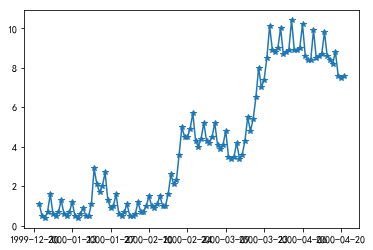

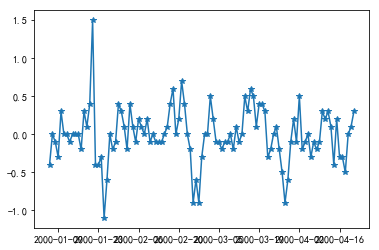

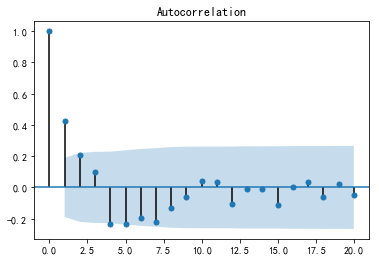

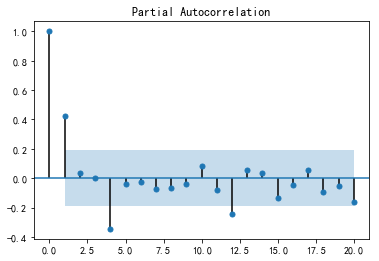

,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,6,42.632142,1.379192e-07,False
1,12,52.594669,4.862721e-07,False
2,18,54.804465,1.374019e-05,False


In [52]:
ts= pd.Series(pd.read_excel(os.path.join(案例数据,"附录1.20.xls"),header=None)[:14].values.flatten()).astype(float)
ts.index=[datetime.datetime(2000,1,1)+datetime.timedelta(days=i) for i in range( len(ts))]
plt.plot(ts,marker='*')
plt.show()


ts_diff_diff4=ts.diff().diff(4).dropna()
plt.plot(ts_diff_diff4,marker='*')
plt.show()

sm.graphics.tsa.plot_acf(ts_diff_diff4,lags=20)
plt.show()

sm.graphics.tsa.plot_pacf(ts_diff_diff4,lags=20)
plt.show()

# acf(ts_diff_diff4,nlags=len(ts_diff_diff4))[:20]

display(my_Q_LB(ts_diff_diff4,out_lags_list=[6,12,18],p_threshold=0.05))